# Diferencijalne jednadžbe

Riješimo diferencijalnu jednadžbu

$$
\frac{d}{dx} y(x)=f(x,y(x)),
$$

uz zadani _početni uvjet_ 

$$ 
y(x_0)=y_0.
$$

## Eulerova metoda

Počevši od točke $x_0$, za niz jednako udaljenih točaka

$$
x_{k+1}=x_{k}+h,
$$

vrijednost funkcije $y_{k+1}$ u točki $x_{k+1}$ se aproksimira s prva dva člana Taylorovog reda oko točke $x_k$:

$$
y(x_{k+1})\approx y_{k+1}=y_k+h f(x_k,y_k).
$$

_Lokalna pogreška_ je $O(h^2)$, a _globalna pogreška_ je $O(h)$ pa metoda nije previše točna.

In [1]:
function myEuler(f::Function,y₀::T,x::T1) where {T,T1}
    h=x[2]-x[1]
    y=Array{T}(undef,length(x))
    y[1]=y₀
    for i=2:length(x)
        y[i]=y[i-1]+h*f(x[i-1],y[i-1])
    end
    y
end

myEuler (generic function with 1 method)

### Primjer 1

Rješenje problema početnih vrijednosti 

$$
y'=x+y,\quad y(0)=1,
$$

je

$$
y=2e^x-x-1
$$

(vidi [Numerička matematika, primjer 8.1][RS04]).

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."

In [2]:
# 10 podintervala na intervalu [0,1]
x=range(0,stop=1,length=11)
f₁(x,y)=x+y
y=myEuler(f₁,1.0,x)

11-element Array{Float64,1}:
 1.0               
 1.1               
 1.2200000000000002
 1.362             
 1.5282            
 1.72102           
 1.943122          
 2.1974342         
 2.48717762        
 2.8158953820000003
 3.1874849202      

In [3]:
using Plots

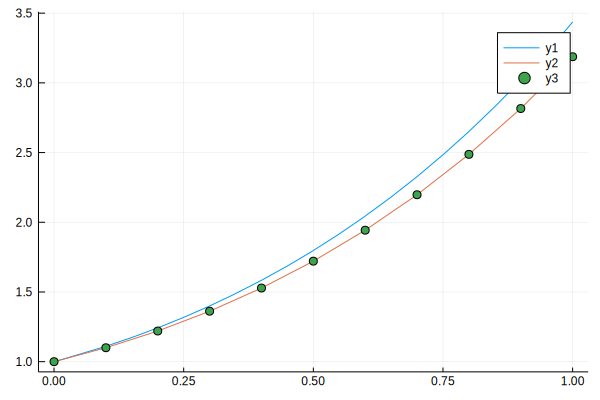

In [4]:
# Nacrtajmo točno rješenje i izračunate točke
solution₁(x)=2*exp(x)-x-1
Plots.plot(solution₁,0,1)
Plots.plot!(x,y)
Plots.scatter!(x,y)

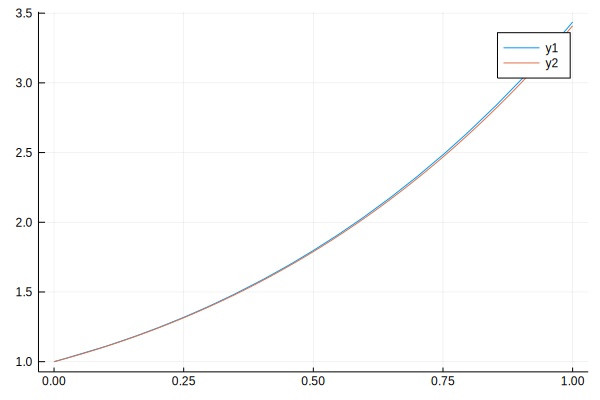

In [5]:
# 100 podintervala na intervalu [0,1]
x=range(0,stop=1,length=101)
y=myEuler(f₁,1.0,x)
Plots.plot(solution₁,0,1)
Plots.plot!(x,y)

### Primjer 2

Rješenje problema

$$
y'=30(\sin x-y), \quad y(0)=0,
$$

je

$$
y(x)=\frac{30}{901}(30\sin x-\cos x+e^{-30x})
$$

(vidi [Numerička matematika, primjer 8.3][RS04]).

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."

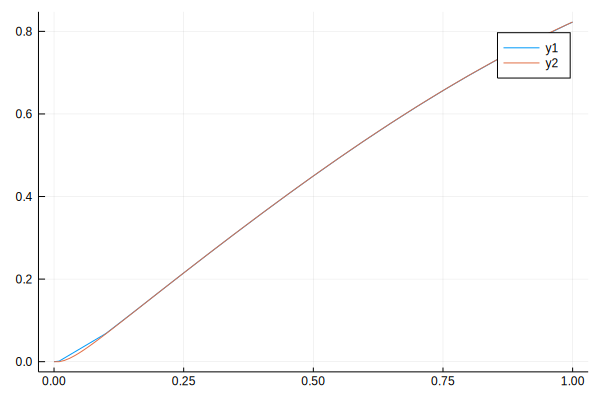

In [6]:
# 100 podintervala na intervalu [0,1]
f₂(x,y)=30(sin(x)-y)
x=range(0,stop=1,length=101)
y=myEuler(f₂,0.0,x)
solution₂(x)=30(30*sin(x)-cos(x)+exp(-30x))/901
Plots.plot(solution₂,0,1)
Plots.plot!(x,y)

## Metode Runge-Kutta

Vrijednost funkcije $y(x)$ u točki $x_{k+1}$ se aproksimira pomoću vrijednosti funkcije $f(x,y)$ u nekoliko odabranih točaka na intervalu 

$$[x_k,x_{k+1}]\equiv[x_k,x_k+h].$$

_Heuneova metoda_:

\begin{align*}
k_1&=hf(x_k,y_k),\\
k_2&=hf(x_k+h,y_k+k_1),\\
y_{k+1}&=y_k+\frac{1}{2}(k_1+k_2).
\end{align*}

_Klasična Runge-Kutta metoda_:

\begin{align*}
k_1&=hf(x_k,y_k),\\
k_2&=hf\big(x_k+\frac{h}{2},y_k+\frac{k_1}{2}\big),\\
k_3&=hf\big(x_k+\frac{h}{2},y_k+\frac{k_2}{2}\big),\\
k_4&=hf(x_k+h,y_k+k_3),\\
y_{k+1}&=y_k+\frac{1}{6}(k_1+2k_2+2k_3+k_4).
\end{align*}

_Heuneova metoda_ je metoda reda 2 (potrebne su dvije evaluacije funkcije $f(x,y)$ u svakom koraku), a _klasična Runge-Kutta_ metoda je metoda reda 4 (potrebne su četiri evaluacije funkcije $f(x,y)$ u svakom koraku).

_Lokalna pogreška_ klasične Runge-Kutta metode je $O(h^5)$.

In [7]:
function myRK4(f::Function,y₀::T,x::T1) where {T,T1}
    h=x[2]-x[1]
    y=Array{T}(undef,length(x))
    y[1]=y₀
    for i=2:length(x)
        ξ=x[i-1]
        η=y[i-1]
        k1=h*f(ξ,η)
        k2=h*f(ξ+h/2,η+k1/2)
        k3=h*f(ξ+h/2,η+k2/2)
        k4=h*f(ξ+h,η+k3)
        y[i]=η+(k1+2*k2+2*k3+k4)/6.0
    end
    y
end

myRK4 (generic function with 1 method)

### Primjer 3

Riješimo probleme iz Primjera 1 i 2. Za Primjer 1 se numeričko rješenje grafički preklapa s točnim rješenjem. 
Za Primjer 2 je rješenje pomoću `myRK4()` ze red veličine točnije od rješenja dobivenog pomoću `myEuler()`. 

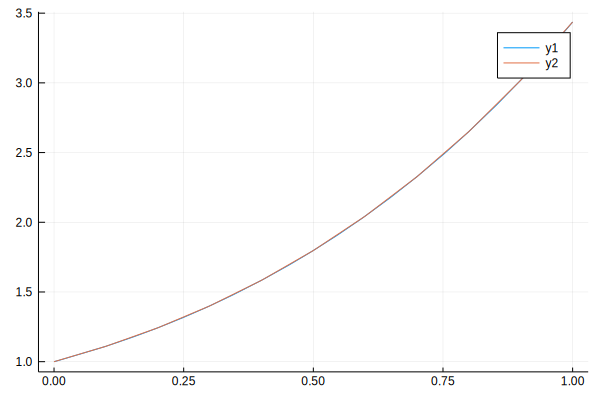

In [8]:
x=range(0,stop=1,length=11)
y=myRK4(f₁,1.0,x)
Plots.plot(solution₁,0,1)
Plots.plot!(x,y)

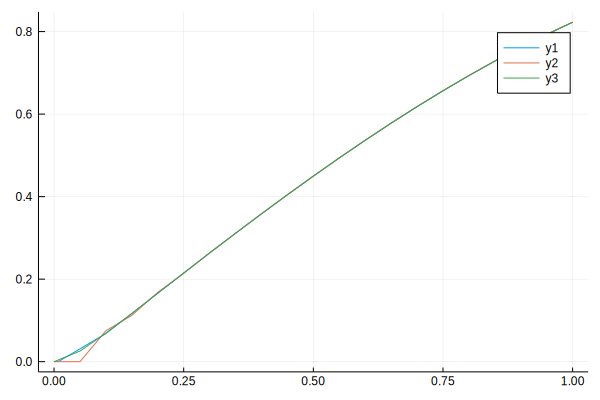

In [9]:
x=range(0,stop=1,length=21)
yEuler=myEuler(f₂,0.0,x)
yRK4=myRK4(f₂,0.0,x)
Plots.plot(solution₂,0,1)
Plots.plot!(x,[yEuler,yRK4])

In [10]:
solution₂(1), yEuler[end],yRK4[end]

(0.8225469668713269, 0.8232246149737463, 0.8224510545539467)

### Postojeće rutine

Većina programa ima ugrađene odgovarajuće rutine za numeričko rješavanje običnioh diferencijalnih jednadžbi.
Tako, na primjer, 

* Ṁatlab ima rutine `ode*` (vidi [Matlab, Ordinary Defferential Equations](http://www.mathworks.com/help/matlab/math/ordinary-differential-equations.html)), a 
* Julia ima paket  `ODE.jl`.

Klasična RK4 metoda je implementirana u funkciji `ode4()`, a Heuneova metoda je implementirana u funkciji 
`ODE.ode2_heun()`. 

__Napomena__ Funkcija `ODE.ode2_heun()` nije vidljiva pozivom naredbe `varinfo()` jer nije izvezena, ali se može vidjeti u datoteci `runge_kutta.jl`.

In [11]:
using ODE

┌ Info: Recompiling stale cache file /home/slap/.julia/compiled/v1.1/ODE/yzDex.ji for ODE [c030b06c-0b6d-57c2-b091-7029874bd033]
└ @ Base loading.jl:1184


In [12]:
# varinfo(ODE)

In [13]:
methods(ode4)

# 2 methods for generic function "(::Type)":
[1] ode4() in ODE at /home/slap/.julia/packages/ODE/OyDLv/src/algorithm_types.jl:8
[2] ode4(fn, y0, tspan; kwargs...) in ODE at /home/slap/.julia/packages/ODE/OyDLv/src/runge_kutta.jl:168

In [14]:
methods(ODE.ode2_heun)

# 1 method for generic function "ode2_heun":
[1] ode2_heun(fn, y0, tspan; kwargs...) in ODE at /home/slap/.julia/packages/ODE/OyDLv/src/runge_kutta.jl:167

In [15]:
# Riješimo problem iz Primjera 2.
# Vrijednosti od y su drugi element izlaza.
yode4=ode4(f₂,0.0,range(0,stop=1,length=21))[2]

21-element Array{Float64,1}:
 0.0                
 0.02577465889736051
 0.06907928362310821
 0.11702221187212225
 0.16598814398449663
 0.21489889878902638
 0.2633708755391625 
 0.31121145682884227
 0.358281525535542  
 0.4044580878726224 
 0.4496242654708331 
 0.4936667669128835 
 0.5364753996450401 
 0.5779431345102801 
 0.6179663155999784 
 0.656444903571796  
 0.6932827213844007 
 0.7283876935110474 
 0.7616720757580776 
 0.7930526744915598 
 0.8224510545539468 

In [16]:
yode2=ODE.ode2_heun(f₂,0.0,range(0,stop=1,length=21))[2]

21-element Array{Float64,1}:
 0.0                
 0.03748437695300875
 0.07956060960424721
 0.12436644911529335
 0.17069172911575453
 0.21773430109009081
 0.2649476084568653 
 0.311945533379127  
 0.35844303729764804
 0.40421917052870876
 0.44909406024188386
 0.49291463237259575
 0.5355457894301516 
 0.5768649951727362 
 0.6167589852602136 
 0.655121803091     
 0.6918536600977667 
 0.7268603073290028 
 0.7600527223736295 
 0.7913469889652425 
 0.8206642924131837 

In [17]:
# Usporedimo rješenja
[yRK4 yode4 yRK4-yode4 yode2 yode4-yode2]

21×5 Array{Float64,2}:
 0.0        0.0         0.0          0.0         0.0        
 0.0257747  0.0257747   0.0          0.0374844  -0.0117097  
 0.0690793  0.0690793   0.0          0.0795606  -0.0104813  
 0.117022   0.117022    1.38778e-17  0.124366   -0.00734424 
 0.165988   0.165988    0.0          0.170692   -0.00470359 
 0.214899   0.214899    0.0          0.217734   -0.0028354  
 0.263371   0.263371    0.0          0.264948   -0.00157673 
 0.311211   0.311211    5.55112e-17  0.311946   -0.000734077
 0.358282   0.358282   -5.55112e-17  0.358443   -0.000161512
 0.404458   0.404458    0.0          0.404219    0.000238917
 0.449624   0.449624    0.0          0.449094    0.000530205
 0.493667   0.493667    0.0          0.492915    0.000752135
 0.536475   0.536475    1.11022e-16  0.535546    0.00092961 
 0.577943   0.577943    0.0          0.576865    0.00107814 
 0.617966   0.617966    0.0          0.616759    0.00120733 
 0.656445   0.656445    0.0          0.655122    0.0013231  
 

## Sustavi diferencijalnih jednadžbi

__Problem.__ Riješimo sustav od $n$ jednadžbi 

\begin{align*}
y_1'(x)&=f_1(x,y_1,y_2,\ldots,y_n),\\
y_2'(x)&=f_2(x,y_1,y_2,\ldots,y_n),\\
&\vdots \\
y_n'(x)&=f_2(x,y_1,y_2,\ldots,y_n)
\end{align*}

i $n$ nepoznatih funkcija $y_1,y_2,\ldots,y_n$ uz početne uvjete

$$
y_i(x_0)=\zeta_i.
$$

Uz oznake 

\begin{align*}
f=\begin{bmatrix}f_1\\ f_2\\ \vdots\\f_n\end{bmatrix},\quad
y=\begin{bmatrix}y_1\\ y_2\\ \vdots \\y_n\end{bmatrix},\quad
\zeta=\begin{bmatrix}\zeta_1\\ \zeta_2\\ \vdots\\ \zeta_n\end{bmatrix},
\end{align*}

zadani problem možemo zapisati u vektorskom obliklu kao 

$$
y'(x)=f(x,y),\quad y(x_0)=\zeta.
$$

Problem se uspješno rješava Eulerovom metodom i Runge-Kutta metodama u vektorskom obliku.

### Primjer 4 - Lhotka-Volterra jednadžbe

Modeliranje sustava _lovac-plijen_ daje sustav _Lhotka-Volterra_ jednadžbi
(vidi [Matematika 2, poglavlje 5.11][IS08] i [Numerička matematika, primjer 8.7][RS04]):

\begin{align*}
\frac{dZ}{dt}&=z\,Z-a\, Z\, V = Z\,(z-a\, V), \tag{1}\\
\frac{dV}{dt}&=-v\,V+b\, Z\, V = V\,(-v+b\, Z), \quad v,z,a,b>0,
\end{align*}

uz početne uvjete 

$$
V(t_0)=V_0,\qquad Z(t_0)=Z_0.
$$

_Stabilna stanja_ su stanja u kojima nema promjene, odnosno, stanja u kojima su obje derivacije jednake nuli. To su _trivijalno_ stabilno stanje, $V=Z=0$ i

$$
V=\frac{z}{a},\qquad Z=\frac{b}{v}. \tag{2}
$$


U _faznom prostoru_, eliminacijom nezavisne varijable $t$, dobijemo jednu linearnu diferencijalnu jednadžbu:

$$
\frac{dV}{dZ}=\frac{\displaystyle\frac{dV}{dt}}{\displaystyle\frac{dZ}{dt}}=
\frac{V\,(-v+b\, Z)}{Z\,(z-a\, V)}. \tag{3}
$$

Ovo je jednadžba sa separiranim varijablama koja ima implicitno zadano rješenje

$$
V^z \, Z^v = C\,  e^{aV}\, e^{bZ},\qquad 
C=\frac{V_0^{z}\, Z_0^{v}}{\displaystyle e^{a V_0}e^{b Z_0}}.
\tag{4}
$$

Riješimo sustav za populacije vukova $V$ i zečeva $Z$ uz

$$
v=0.02, \quad z=0.06,\quad a=0.001,\quad b=0.00002,\quad V(0)=30, \quad Z(0)=800,
$$

te riješenje u faznom prostoru usporedimo s egzaktnim rješenjem.

__Napomena.__ Funkcije `myEuler()`, `myRK4()` i funkcije iz paketa `ODE.jl` su već prilagođene i za rješavanje sustava.

[IS08]: http://lavica.fesb.hr/mat2/predavanja/node46.html "I. Slapničar, 'Matematika 2', FESB, Split, 2008."

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."

In [18]:
# y=[V,Z], t₀=0, y₀=y(0)=[30,800]
t=range(0,stop=365,length=3651) # 356 dana s razmakom od 1/10 dana
v=0.02
z=0.06
a=0.001
b=0.00002
V₀=30.0 # pocetna populacija vukova
Z₀=800.0 # pocetna populacija zeceva
y₀=[V₀,Z₀]
fVZ(t,y)=[y[1]*(-v+b*y[2]),y[2]*(z-a*y[1])]
y=myEuler(fVZ,y₀,t)

3651-element Array{Array{Float64,1},1}:
 [30.0, 800.0]     
 [29.988, 802.4]   
 [29.9761, 804.808]
 [29.9644, 807.225]
 [29.9529, 809.649]
 [29.9415, 812.082]
 [29.9302, 814.523]
 [29.9191, 816.972]
 [29.9082, 819.43] 
 [29.8974, 821.895]
 [29.8867, 824.37] 
 [29.8762, 826.852]
 [29.8659, 829.343]
 ⋮                 
 [36.3502, 405.478]
 [36.307, 406.436] 
 [36.2639, 407.399]
 [36.2209, 408.366]
 [36.178, 409.338] 
 [36.1353, 410.313]
 [36.0927, 411.292]
 [36.0502, 412.275]
 [36.0078, 413.263]
 [35.9655, 414.254]
 [35.9234, 415.25] 
 [35.8814, 416.249]

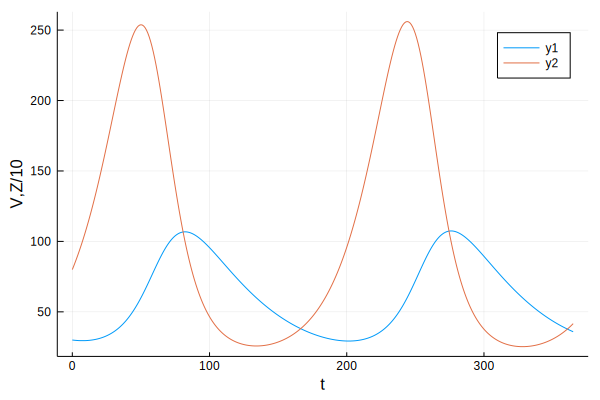

In [19]:
# Skaliramo Z u Z/10 da graf bude čitkiji
V=map(Float64,[y[i][1] for i=1:length(y)])
Z=map(Float64,[y[i][2] for i=1:length(y)])
Plots.plot(t[1:10:end],[V[1:10:end],Z[1:10:end]/10],xlabel="t",ylabel="V,Z/10")

In [20]:
# Usporedimo rješenja s metodom myRK4() i ode4() 
yRK4=myRK4(fVZ,y₀,t)
yode4=ode4(fVZ,y₀,t)[2]
[y yRK4 yode4]

3651×3 Array{Array{Float64,1},2}:
 [30.0, 800.0]       [30.0, 800.0]       [30.0, 800.0]     
 [29.988, 802.4]     [29.9881, 802.404]  [29.9881, 802.404]
 [29.9761, 804.808]  [29.9763, 804.816]  [29.9763, 804.816]
 [29.9644, 807.225]  [29.9647, 807.237]  [29.9647, 807.237]
 [29.9529, 809.649]  [29.9532, 809.665]  [29.9532, 809.665]
 [29.9415, 812.082]  [29.9419, 812.102]  [29.9419, 812.102]
 [29.9302, 814.523]  [29.9307, 814.548]  [29.9307, 814.548]
 [29.9191, 816.972]  [29.9197, 817.001]  [29.9197, 817.001]
 [29.9082, 819.43]   [29.9088, 819.463]  [29.9088, 819.463]
 [29.8974, 821.895]  [29.8981, 821.933]  [29.8981, 821.933]
 [29.8867, 824.37]   [29.8875, 824.411]  [29.8875, 824.411]
 [29.8762, 826.852]  [29.8771, 826.898]  [29.8771, 826.898]
 [29.8659, 829.343]  [29.8668, 829.393]  [29.8668, 829.393]
 ⋮                                                         
 [36.3502, 405.478]  [36.5054, 420.609]  [36.5054, 420.609]
 [36.307, 406.436]   [36.4631, 421.599]  [36.4631, 421.599]
 [36.2

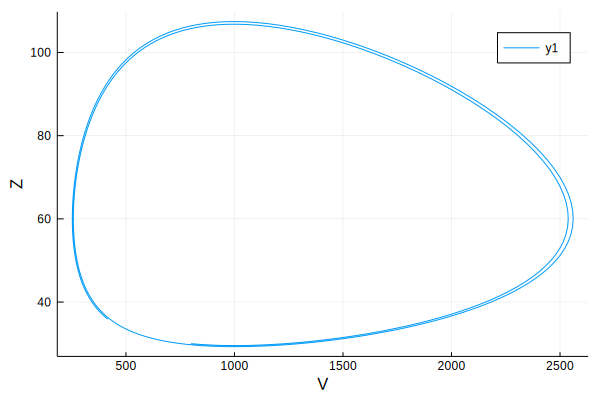

In [21]:
# Nacrtajmo rješenje u faznom prostoru
Plots.plot(Z[1:10:end],V[1:10:end],xlabel="V",ylabel="Z")

### Skalirane Lhotka-Volterra jednadžbe

Crtanje egzaktnog rješenja (3) u faznom prostoru nije moguće direktno, 
jer crtanje implicitno zadanih funkcija na velikom području traje izuzetno dugo. Međutim, 
pomoću transformacija (vidi [Modeling Complex Systems, poglavlje 2.1][NB10])

$$
X=\frac{b}{v}Z,\quad Y=\frac{a}{z}V,\quad \tau=\sqrt{z\cdot v}\, t,\quad \rho=\sqrt{\displaystyle\frac{z}{v}},
$$

jednadžbu (1) je moguće prikazati u _bezdimenzionalnim varijablama_
u _skaliranom vremenu_ $\tau$:

\begin{align*}
\frac{dX}{d\tau}&=\rho\, X\,(1-Y),\tag{5} \\
\frac{dY}{d\tau}&=-\frac{1}{\rho}\, Y\,(1-X). 
\end{align*}

Sustav (5) ovisi o samo _jednom_ parametru $\rho$. Sustav ima netrivijalno stabilno rješenje $X=Y=1$, a rješenje 
(4) u faznom prostoru je

$$
Y \, X^{1/\rho^2} = C\,  e^{Y}\, e^{X/\rho^2},\qquad 
C=\frac{Y_0\, X_0^{1/\rho^2}}{\displaystyle e^{Y_0}e^{X_0/\rho^2}}.
$$


Riješimo sustav iz Primjera 4 u bezdimenzionalnom obliku i grafički usporedimo rješenja:

[NB10]: http://www.springer.com/us/book/9781441965615 "Nino Boccara, 'Modeling Complex Systems', 2nd Edition, Springer, 2010." 

In [22]:
ρ=sqrt(z/v)
τ=range(0,stop=365*sqrt(z*v),length=3651)
y₀=[Z₀*b/v,V₀*a/z]
fXY(τ,y)=[ρ*y[1]*(1-y[2]),-y[2]*(1-y[1])/ρ]
y=myEuler(fXY,y₀,τ)

3651-element Array{Array{Float64,1},1}:
 [0.8, 0.5]          
 [0.8024, 0.4998]    
 [0.804808, 0.499602]
 [0.807225, 0.499407]
 [0.809649, 0.499215]
 [0.812082, 0.499025]
 [0.814523, 0.498837]
 [0.816972, 0.498652]
 [0.81943, 0.49847]  
 [0.821895, 0.49829] 
 [0.82437, 0.498112] 
 [0.826852, 0.497937]
 [0.829343, 0.497765]
 ⋮                   
 [0.405478, 0.605836]
 [0.406436, 0.605116]
 [0.407399, 0.604398]
 [0.408366, 0.603681]
 [0.409338, 0.602967]
 [0.410313, 0.602255]
 [0.411292, 0.601544]
 [0.412275, 0.600836]
 [0.413263, 0.60013] 
 [0.414254, 0.599426]
 [0.41525, 0.598723] 
 [0.416249, 0.598023]

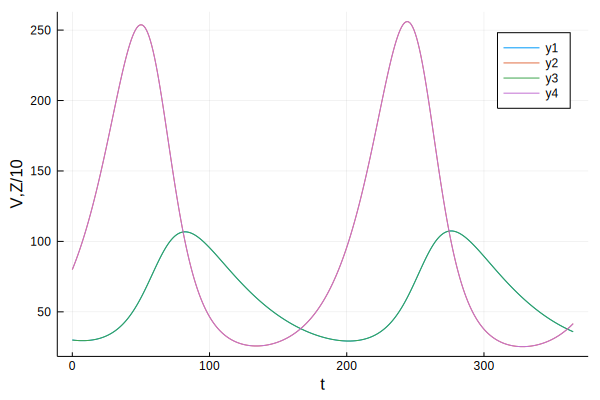

In [23]:
X=[y[i][1] for i=1:length(y)]
Y=[y[i][2] for i=1:length(y)]
# Rješenja se poklapaju
Plots.plot(t[1:10:end],[V[1:10:end],Z[1:10:end]/10])
Plots.plot!(τ[1:10:end]/sqrt(z*v),[Y[1:10:end]*z/a,X[1:10:end]*v/(10b)],
    xlabel="t",ylabel="V,Z/10")

In [24]:
using SymPy, PyPlot

┌ Info: Recompiling stale cache file /home/slap/.julia/compiled/v1.1/SymPy/KzewI.ji for SymPy [24249f21-da20-56a4-8eb1-6a02cf4ae2e6]
└ @ Base loading.jl:1184


In [25]:
?SymPy.plot_implicit

Plot an implicit equation

```
@syms x y
plot_implicit(Eq(x^2+ y^2,3), (x, -2, 2), (y, -2, 2))
```


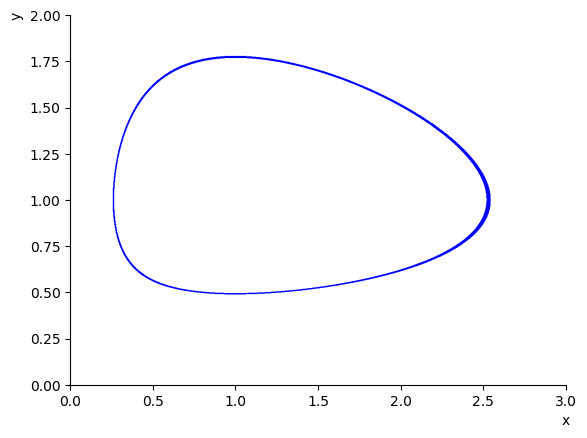

PyObject <sympy.plotting.plot.Plot object at 0x7f55f880bd30>

In [26]:
# Crtanje implicitne funkcije traje dugo.
@syms x y
σ=1/ρ^2
C₀=(y₀[2]*y₀[1]^σ)/exp(y₀[2]+σ*y₀[1])
SymPy.plot_implicit(Eq(y*x^σ,C₀*exp(y+σ*x)),(x,0,3),(y,0,2))

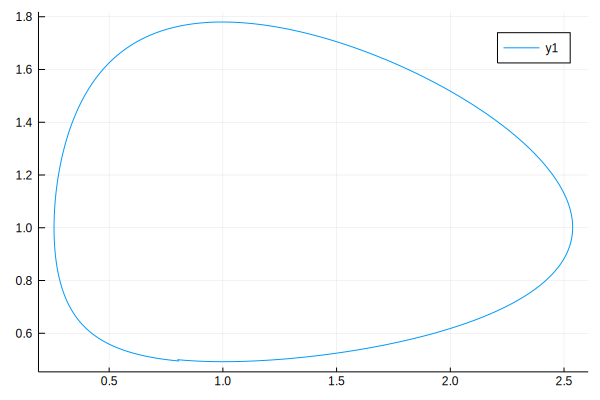

In [27]:
# Nacrtajmo izračunato rješenje u faznom prostoru. 
# Vidimo da su grafovi (gotovo) isti.
Plots.plot(X[1:div((length(X)-1),2)+120],Y[1:div((length(X)-1),2)+120])

## Diferencijalne jednadžbe višeg reda

Diferencijalna jednadžba višeg reda supstitucijama se može svesti na sustav diferencijalnih jednadžbi prvog reda.

### Primjer 5

Rješenje problema početnih vrijednosti (vidi [Matematika 2, primjer 5.28][IS08])

$$
y'''+y''=x,\qquad y(0)=0,\quad y'(0)=0,\quad y''(0)=0
$$

je

$$
y(x)=-1+x+e^{-x}+\frac{x^3}{6}-\frac{x^2}{2}.
$$

Supstitucije

$$
y'=u,\quad y''=v,
$$

daju sustav 

\begin{align*}
y'&=u \\
u'&=v \\
v'&=-v+x\\
\end{align*}

uz početne uvjete

$$
y(0)=0,\quad u(0)=0,\quad v(0)=0.
$$

[IS08]: http://lavica.fesb.hr/mat2/predavanja/node46.html "I. Slapničar, 'Matematika 2', FESB, Split, 2008."

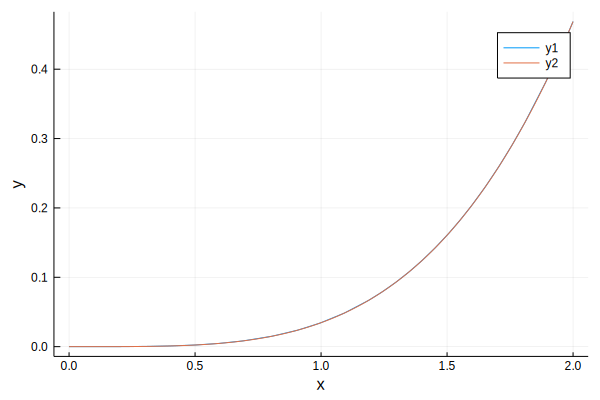

In [28]:
x=range(0,stop=2,length=201)
y₀=[0.0,0,0]
f₅(x,y)=[y[2],y[3],-y[3]+x]
# Izračunato rješenje je prvi element polja y
yEuler=myEuler(f₅,y₀,x)
yRK4=myRK4(f₅,y₀,x)
Y=[yRK4[i][1] for i=1:length(yEuler)]
# Egzaktno rješenje
solution₅(x)=-1+x+exp(-x)+x^3/6-x^2/2
# Nacrtajmo
Plots.plot(solution₅,0,2)
Plots.plot!(x,Y,xlabel="x",ylabel="y")

In [29]:
# Norma pogreške u promatranim točkama
# using LinearAlgebra
# norm(solution₅.(x)-Y)
# Bez paketa LinearAlgebra
sqrt(sum((solution₅.(x)-Y).^2))

3.670907947195479e-10